# aggregation window functions

In [ ]:
-- windows function
-- over clause and partition by

-- over
-- the over clause in SQL is used with window functions(like sum,count,row_number, etc.,)
-- to perform calculations across a specific set of rows related to the current row.

-- the over clause allows for partitioning and ordering rows.
-- without collapsing then into a single result like aggregate.

-- Types of windows functions
-- aggregate fn: sum(),min(),avg(),max(),count()
-- ranking fn:row_number(),rank(),dense_rank(),ntile()
-- value fn:lead(),lag(),first_value(),last_value()

create table sales(
sales_id int,
salesperson varchar(50),
region varchar(50),
amount decimal(10,2)
)

insert into sales (sales_id,salesperson,region,amount)
values(1,'alice','north',500),
(2,'bob','south',300),
(3,'alice','north',200),
(4,'charlie','south',700),
(5,'bob','south',400),
(6,'alice','north',800);

select * from sales;

-- find out the total amount based on each region
select sum(amount),region from sales
group by region;

select *,sum(amount) over(partition by region) from sales;

-- find out min amount based on each region
select *,min(amount) over(partition by region) from sales;

-- find out max amount based on each region
select *,max(amount) over(partition by region) from sales;

-- find out avg amount based on each region
select *,avg(amount) over(partition by region) from sales;

select *,min(amount) over(partition by region) as min_amt,
max(amount) over(partition by region) as max_amt,
avg(amount) over(partition by region) as avg_amt
from sales;



# rank, dense_rank, row_number

In [ ]:
-- windows function
-- row number, rank,dense_rank

-- assign ranks or numbers to rows based on the order defined in the
-- orderby clause of the over() window function

create table employees1(
name varchar(100),
employee_id int,
department varchar(30),
salary int
)

insert into employees1 
(name,employee_id,department,salary) 
values('alice',1,'sales',5000),
('bob',2,'sales',3000),
('charlie',3,'sales',3000),
('eve',4,'sales',2000),
('dany',5,'sales',2000)

select * from employees1;

select *, ROW_NUMBER()over(order by salary desc) as row_no,
rank()over(order by salary desc) as rnk,
dense_rank()over(order by salary desc)as den_rnk from employees1;


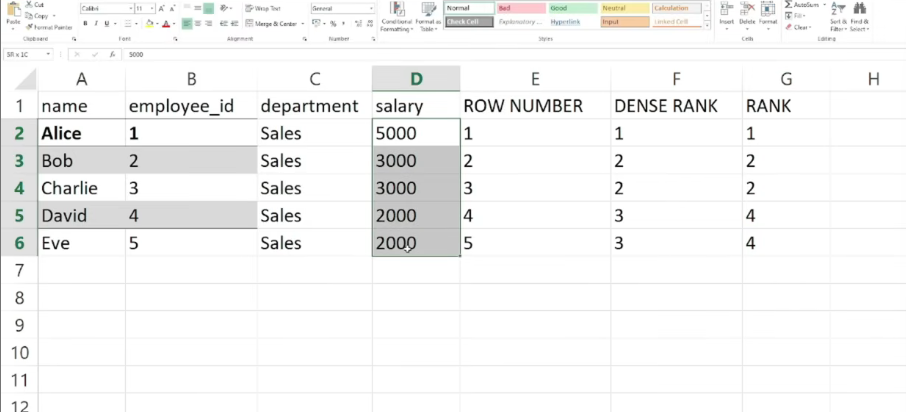